In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [2]:
# Initialize TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

In [6]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Define regression model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(13,)), # Changed input_shape to (13,)
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 541.0584 - mae: 21.3482 - val_loss: 543.9772 - val_mae: 21.5327
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 470.7316 - mae: 19.6938 - val_loss: 432.8677 - val_mae: 18.8589
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 331.9996 - mae: 16.3759 - val_loss: 289.6799 - val_mae: 14.7670
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 195.1830 - mae: 11.5653 - val_loss: 159.7753 - val_mae: 9.7460
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 106.2449 - mae: 8.0979 - val_loss: 99.1934 - val_mae: 7.4427
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 80.6150 - mae: 6.7880 - val_loss: 74.1901 - val_mae: 6.5280
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 65.5962 - mae: 6.0408 - val_loss: 57.1541 - val_mae: 5.6325
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.3631 - mae: 4.8488 - val_loss: 47.8882 - val_mae: 5.0702
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━

In [11]:
# Predictions
y_pred = model.predict(X_test)

# Compute regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Mean Absolute Error: 3.2352
Mean Squared Error: 25.4272
R^2 Score: 0.6945


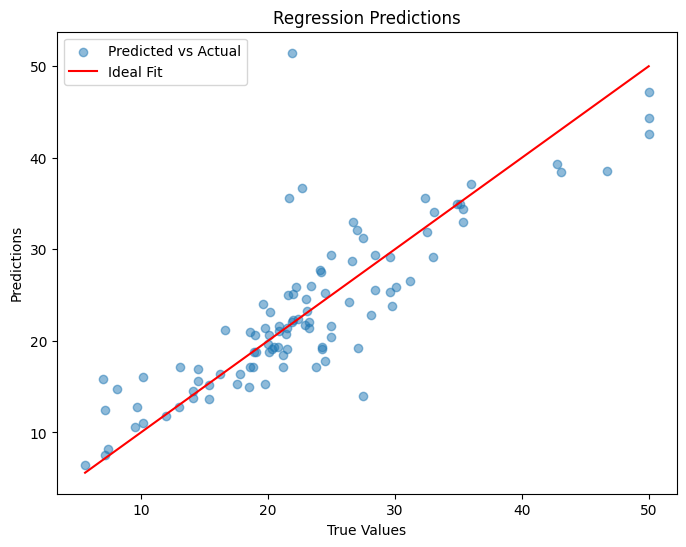

In [13]:
# Plot predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Regression Predictions")
plt.legend()
plt.show()

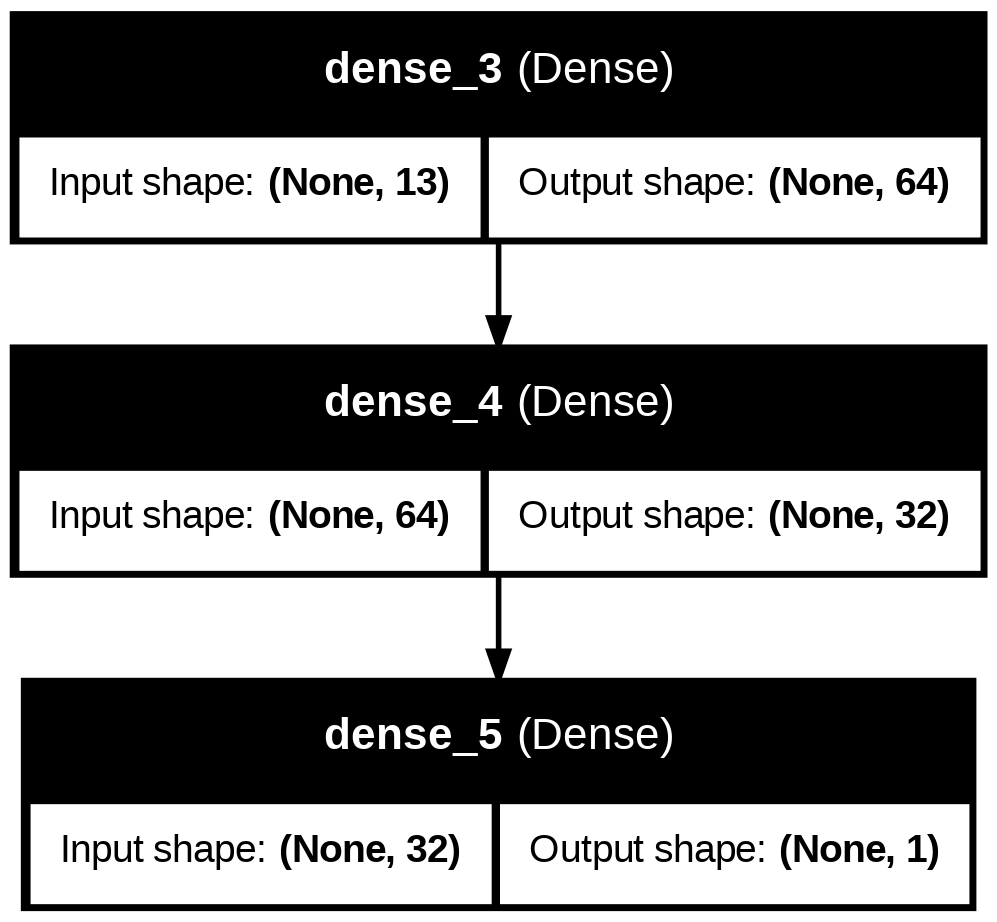

In [14]:
# Log model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='regression_model.png', show_shapes=True, show_layer_names=True)

In [15]:
# Print model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)